In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\yashk\Downloads\Wine.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


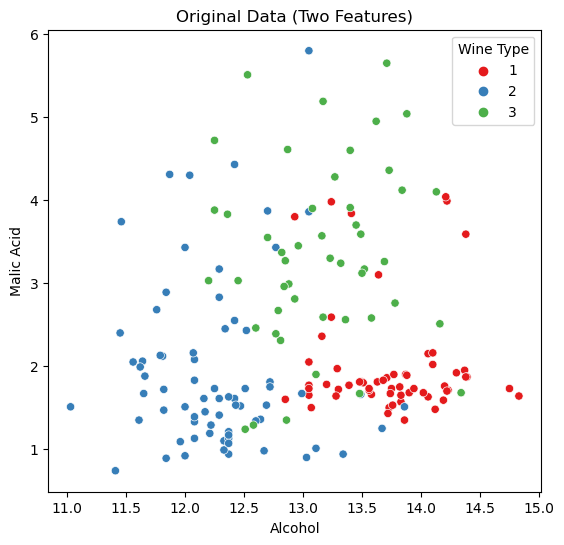

In [11]:
plt.figure(figsize=(14, 6))

# Subplot for the original data (first two features for visualization)
plt.subplot(1, 2, 1)
sns.scatterplot(x='Alcohol', y='Malic_Acid', hue='Customer_Segment', data=data, palette='Set1')
plt.title('Original Data (Two Features)')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(title='Wine Type')

In [16]:
features = data.drop(columns=['Customer_Segment'])

In [18]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
pca = PCA(n_components=2)  # Choosing 2 components for easy visualization
principal_components = pca.fit_transform(features_scaled)

In [23]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Customer_Segment'] = data['Customer_Segment']

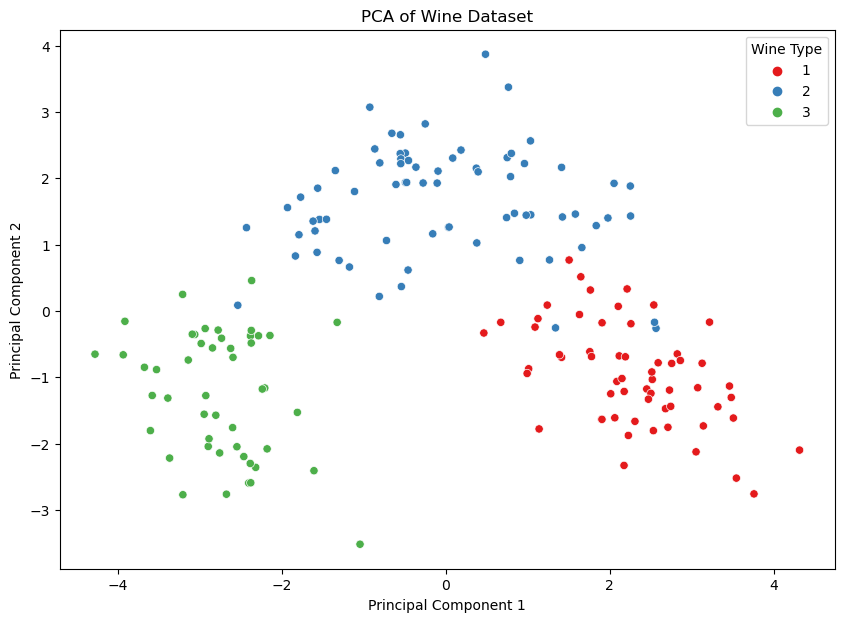

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Customer_Segment', data=pca_df, palette='Set1')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Type')
plt.show()